In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import keras
import tensorflow as tf
import keras.backend as K
from sklearn import preprocessing
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
#Add the columns of the dataset

column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']



In [ ]:
#Load the datasets
df = pd.read_csv("KDDTrain.csv", header=None, names = column_names)
df_test = pd.read_csv("KDDTest.csv", header=None, names = column_names)

print('Dimensions of the Training set: ', df.shape)
print('Dimensions of the Test set: ', df_test.shape)

Dimensions of the Training set:  (125973, 42)
Dimensions of the Test set:  (22544, 42)


In [ ]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# EXPORE THE DATASET

In [ ]:
#Explore dataset
print('Label Count for Training Set: ')
print(df['label'].value_counts())
print()
print('Label Count for Test Set: ')
print(df_test['label'].value_counts())

Label Count for Training Set: 
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label Count for Test Set: 
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack   

In [ ]:
#columns are categorical, not yet binary

print('Training set:')
for column_names in df.columns:
    if df[column_names].dtypes == 'object' :
        unique_cat = len(df[column_names].unique())
        print("Feature '{column_names}' has {unique_cat} categories".format(column_names=column_names, unique_cat=unique_cat))

print()
print('Label distribution: ')
print(df['service'].value_counts().sort_values(ascending=False).head())



Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Label distribution: 
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


# TEST AND TRAINING SET ABOVE AND BELOW

In [ ]:
#Test set
print('Test set:')
for column_names in df_test.columns:
    if df_test[column_names].dtypes == 'object' :
        unique_cat = len(df_test[column_names].unique())
        print("Feature '{column_names}' has {unique_cat} categories".format(column_names=column_names, unique_cat=unique_cat))

print()
print('Label distribution: ')
print(df_test['service'].value_counts().sort_values(ascending=False).head())


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories

Label distribution: 
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


# ONE HOT ENCODING PROCESS

In [ ]:
#LabelEncoder Insert categorical features into a 2D numpy array

categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()



,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
#Had to keep for One-Hot Encode

# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
#print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
#print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
#print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

In [ ]:
#Transform categorical features into numberes using LabelEncoder()
df_categorical_values_enc= df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [ ]:
#One-Hot Encoding

encoder = OneHotEncoder(categories='auto')
df_categorical_values_encenc = encoder.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)


# test set
testdf_categorical_values_encenc = encoder.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()



,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# MISSING COLOUMNS

In [ ]:
#Missing columns in the test set are added

trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()
difference = list(set(trainservice) - set(testservice))
string = 'service_'
difference = [string + x for x in difference]
difference


['service_aol',
 'service_harvest',
 'service_urh_i',
 'service_http_2784',
 'service_http_8001',
 'service_red_i']

In [ ]:
for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)


(125973, 84)
(22544, 84)


In [ ]:
#Add additional columns

newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [ ]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']


# change the label column


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})


# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [ ]:
to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]

#filter coloumns

DoS_df=newdf[newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[newdf['label'].isin(to_drop_U2R)];



#test
DoS_df_test=newdf_test[newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[newdf_test['label'].isin(to_drop_U2R)];


print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)

Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


# FEATURE SCALING

In [ ]:
# Split dataframes into X & Y
# X Features , Y result changes

X_DoS = DoS_df.drop('label', axis=1)
Y_DoS = DoS_df['label']

X_Probe = Probe_df.drop('label', axis=1)
Y_Probe = Probe_df['label']

X_R2L = R2L_df.drop('label', axis=1)
Y_R2L = R2L_df['label']

X_U2R = U2R_df.drop('label', axis=1)
Y_U2R = U2R_df['label']

# Test set
X_DoS_test = DoS_df_test.drop('label', axis=1)
Y_DoS_test = DoS_df_test['label']

X_Probe_test = Probe_df_test.drop('label', axis=1)
Y_Probe_test = Probe_df_test['label']

X_R2L_test = R2L_df_test.drop('label', axis=1)
Y_R2L_test = R2L_df_test['label']

X_U2R_test = U2R_df_test.drop('label', axis=1)
Y_U2R_test = U2R_df_test['label']


In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [ ]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)

scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)

scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)

scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

In [ ]:
x = newdf.drop(['duration','land','wrong_fragment','urgent','num_failed_logins','logged_in','num_compromised',
                'num_file_creations','num_root','root_shell','su_attempted','num_shells','num_access_files',
                'num_outbound_cmds','is_host_login','is_guest_login','flag_S2','flag_S3','flag_SH','srv_rerror_rate',
                'service_csnet_ns','service_ctf','service_daytime','service_discard','service_domain','service_domain_u',
                'service_echo','service_eco_i','service_ecr_i','service_efs','service_exec','service_finger','service_ftp',
                'service_ftp_data','service_gopher','service_netbios_ns','service_ldap','service_kshell','service_klogin',
                'service_iso_tsap','service_imap4','service_http_443','service_hostnames','service_netbios_dgm','service_name',
                'service_mtp','service_login','service_link','service_pop_3','service_pop_2','service_pm_dump','service_other',
                'service_ntp_u','service_nntp','service_nnsp','service_netstat','service_netbios_ssn','service_ssh',
                'service_sql_net','service_sunrpc','service_smtp','service_shell','service_rje','service_remote_job',
                'service_private','service_printer','service_uucp_path','service_uucp','service_urp_i','service_time',
                'service_tim_i','service_tftp_u','service_telnet','service_systat','service_supdup','dst_host_count',
                'srv_diff_host_rate','diff_srv_rate','flag_S0','flag_S1','rerror_rate','flag_RSTR','flag_RSTOS0','flag_RSTO',
                'flag_REJ','flag_OTH','service_whois','service_vmnet','srv_serror_rate','serror_rate','service_urh_i',
                'service_red_i','service_harvest','service_http_2784','dst_host_srv_rerror_rate','dst_host_rerror_rate',
                'dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_srv_diff_host_rate','Protocol_type_tcp',
                'Protocol_type_udp','service_IRC','service_X11','service_Z39_50','service_auth','service_bgp','service_courier',
                'service_http_8001','service_aol'], axis=1)

x_test =newdf_test.drop(['duration','land','wrong_fragment','urgent','num_failed_logins','logged_in','num_compromised',
                         'num_file_creations','num_root','root_shell','su_attempted','num_shells','num_access_files',
                         'num_outbound_cmds','is_host_login','is_guest_login','flag_S2','flag_S3','flag_SH','srv_rerror_rate',
                         'service_csnet_ns','service_ctf','service_daytime','service_discard','service_domain','service_domain_u',
                         'service_echo','service_eco_i','service_ecr_i','service_efs','service_exec','service_finger','service_ftp',
                         'service_ftp_data','service_gopher','service_netbios_ns','service_ldap','service_kshell','service_klogin',
                         'service_iso_tsap','service_imap4','service_http_443','service_hostnames','service_netbios_dgm','service_name',
                         'service_mtp','service_login','service_link','service_pop_3','service_pop_2','service_pm_dump','service_other',
                         'service_ntp_u','service_nntp','service_nnsp','service_netstat','service_netbios_ssn','service_ssh',
                         'service_sql_net','service_sunrpc','service_smtp','service_shell','service_rje','service_remote_job',
                         'service_private','service_printer','service_uucp_path','service_uucp','service_urp_i','service_time',
                         'service_tim_i','service_tftp_u','service_telnet','service_systat','service_supdup','dst_host_count',
                         'srv_diff_host_rate','diff_srv_rate','flag_S0','flag_S1','rerror_rate','flag_RSTR','flag_RSTOS0','flag_RSTO',
                         'flag_REJ','flag_OTH','service_whois','service_vmnet','srv_serror_rate','serror_rate','service_urh_i',
                         'service_red_i','service_harvest','service_http_2784','dst_host_srv_rerror_rate','dst_host_rerror_rate',
                         'dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_srv_diff_host_rate','Protocol_type_tcp',
                         'Protocol_type_udp','service_IRC','service_X11','service_Z39_50','service_auth','service_bgp','service_courier',
                         'service_http_8001','service_aol'], axis=1)

# STANDARDIZATION / SPLIT / SCALE

In [ ]:
#standardization

# Split dataframes into X & Y

X_Df = x.drop('label', axis=1)
Y_Df = newdf.label

# test set
XDf_test = x_test.drop('label', axis=1) #Had to change variable name. It was picking up shape of X_Df. Not sure how.
Y_Df_test = newdf_test.label

In [ ]:
X_Df.shape


(125973, 13)

In [ ]:
#columns saved for later use

colNames = list(X_Df)
colNames_test = list(XDf_test)


In [ ]:
scaler1 = preprocessing.StandardScaler().fit(X_Df)
X_Df=scaler1.transform(X_Df)

#test data
scaler2 = preprocessing.StandardScaler().fit(XDf_test)
X_Df_test=scaler2.transform(XDf_test)

XDf_test = XDf_test.astype('float32') #corrected from X_Df_test = X_Df.astype nevermind. Had to change variable name to XDF_test due to mishap with X_Df
Y_Df_test= Y_Df_test.astype('float32')


In [ ]:
y_binary = to_categorical(Y_Df, num_classes=5)
y_test_binary = to_categorical(Y_Df_test, num_classes=5)

# RANDOM FOREST

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.94      0.77      9711
         1.0       0.83      0.65      0.73      7460
         2.0       0.52      0.59      0.56      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.68     22544
   macro avg       0.40      0.44      0.41     22544
weighted avg       0.61      0.68      0.63     22544

Accuracy: 0.6841731724627396
Confusion Matrix:
 [[9162   43  506    0    0]
 [2057 4827  576    0    0]
 [ 131  855 1435    0    0]
 [2598   74  213    0    0]
 [  58    0    9    0    0]]


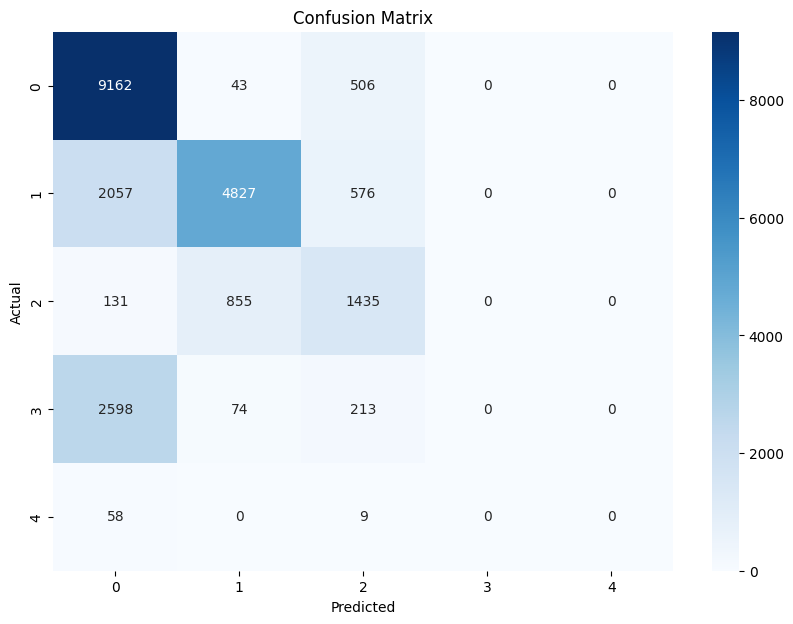

              precision    recall  f1-score       support
0.0            0.654148  0.943466  0.772610   9711.000000
1.0            0.832385  0.647051  0.728109   7460.000000
2.0            0.523914  0.592730  0.556202   2421.000000
3.0            0.000000  0.000000  0.000000   2885.000000
4.0            0.000000  0.000000  0.000000     67.000000
accuracy       0.684173  0.684173  0.684173      0.684173
macro avg      0.402089  0.436649  0.411384  22544.000000
weighted avg   0.613486  0.684173  0.633476  22544.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: 'numpy.float64' object is not callable

In [ ]:


# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_Df, y_binary) #changed from Y_Df - TW


# Make predictions on the test set
y_pred = rf.predict(X_Df_test)
y_pred_class = np.argmax(y_pred, axis=1) #Added this for classification error - TW


# Evaluate the model
print("Classification Report:\n", classification_report(Y_Df_test, y_pred_class)) #changed y_pred to y_pred_class - TW
print("Accuracy:", accuracy_score(Y_Df_test, y_pred_class)) #changed y_pred to y_pred_class - TW
print("Confusion Matrix:\n", confusion_matrix(Y_Df_test, y_pred_class)) #changed y_pred to y_pred_class - TW

# Plot the confusion matrix
conf_matrix = confusion_matrix(Y_Df_test, y_pred_class) #changed y_pred to y_pred_class - TW
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a DataFrame for the classification report
report = classification_report(Y_Df_test, y_pred_class, output_dict=True) #changed y_pred to y_pred_class - TW
df_classification_report = pd.DataFrame(report).transpose()
print(df_classification_report)



# Define the grid of hyperparameters

grid_space = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3]  # Avoid setting min_samples_split=1, which can lead to overfitting
}


from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC for each class
n_classes = len(np.unique(Y_Df_test))
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_Df_test == i, y_pred_class == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()





#Learning Curve
'''
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X_Df, Y_Df, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()
'''


'''
# Create and fit the GridSearchCV model
grid = GridSearchCV(estimator=rf, param_grid=grid_space, cv=3, scoring='accuracy')
model_grid = grid.fit(X_Df, Y_Df)

# Print the best hyperparameters and best score
print('Best hyperparameters are:', model_grid.best_params_)
print('Best score is:', model_grid.best_score_)



# Create a DataFrame for the grid search results
results = pd.DataFrame(model_grid.cv_results_)
print(results[['params', 'mean_test_score', 'rank_test_score']])

# Plotting Grid Search Results
plt.figure(figsize=(12, 8))
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_max_depth', data=results)
plt.title('Grid Search Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend(title='Max Depth')
plt.show()
'''

## SUPPORT VECTOR MACHINE

In [1]:
from sklearn.svm import SVC

In [ ]:
# prompt: Define SVC, build, train and evaluate SVM algorithm, experiment with different kernels

# Create an SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# Train the model
svm_linear.fit(X_Df, Y_Df)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_Df_test)

# Evaluate the model
print("Linear Kernel:")
print(classification_report(Y_Df_test, y_pred_linear,zero_division=0))
print("Accuracy:", accuracy_score(Y_Df_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(Y_Df_test, y_pred_linear))

# Create an SVM classifier with a radial basis function (RBF) kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the model
svm_rbf.fit(X_Df, Y_Df)

# Make predictions on the test set
y_pred_rbf = svm_rbf.predict(X_Df_test)

# Evaluate the model
print("\nRBF Kernel:")
print(classification_report(Y_Df_test, y_pred_rbf,zero_division=0))
print("Accuracy:", accuracy_score(Y_Df_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(Y_Df_test, y_pred_rbf))

# Create an SVM classifier with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, random_state=42)

# Train the model
svm_poly.fit(X_Df, Y_Df)

# Make predictions on the test set
y_pred_poly = svm_poly.predict(X_Df_test)

# Evaluate the model
print("\nPolynomial Kernel:")
print(classification_report(Y_Df_test, y_pred_poly,zero_division=0))
print("Accuracy:", accuracy_score(Y_Df_test, y_pred_poly))
print("Confusion Matrix:\n", confusion_matrix(Y_Df_test, y_pred_poly))


# DNN

In [ ]:


#Create the neural network

dnn = Sequential()
dnn.add(Dense(units=256, activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.1))
dnn.add(Dense(units=128, activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dense(units=5, activation='softmax'))




In [ ]:
dnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="modeldnn.keras", verbose=0, save_best_only=True)

In [ ]:
dnn.fit(X_Df, y_binary, epochs=50, batch_size=128, verbose=1, validation_split=0.1, callbacks=[checkpointer, monitor])

Epoch 1/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9890 - loss: 0.0276 - val_accuracy: 0.9883 - val_loss: 0.0280
Epoch 2/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9887 - loss: 0.0288 - val_accuracy: 0.9869 - val_loss: 0.0421
Epoch 3/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9891 - loss: 0.0284 - val_accuracy: 0.9887 - val_loss: 0.0334
Epoch 4/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9894 - loss: 0.0265 - val_accuracy: 0.9882 - val_loss: 0.0344
Epoch 4: early stopping


In [ ]:
loss, results = dnn.evaluate(X_Df_test, Y_Df_test, verbose=1)

print(f'Test loss: {loss}')
print(f'Test accuracy: {results}')

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5885 - loss: 48.7806
Test loss: 49.165714263916016
Test accuracy: 0.5955021381378174


Accuracy: 71.48%
              precision    recall  f1-score   support

         0.0       0.67      0.93      0.78      9711
         1.0       0.83      0.73      0.78      7460
         2.0       0.66      0.65      0.65      2421
         3.0       0.90      0.03      0.06      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.71     22544
   macro avg       0.61      0.47      0.45     22544
weighted avg       0.75      0.71      0.67     22544

ROC AUC: 81.01% 



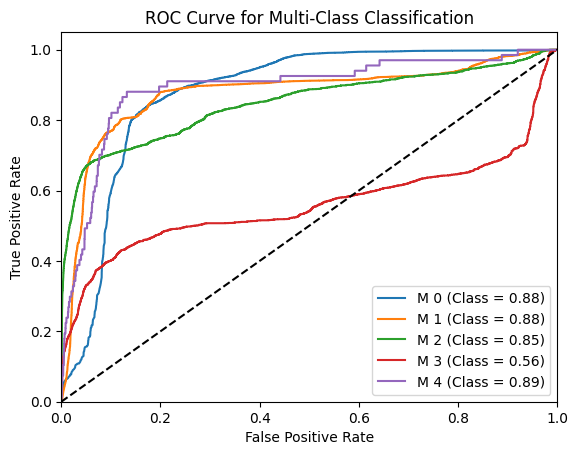

Confusion:
[[8988  262  456    4    1]
 [1783 5456  221    0    0]
 [ 127  718 1576    0    0]
 [2483  158  146   94    4]
 [  44    9    7    7    0]]


In [ ]:
#Precision, Recall, FI-Score, and ROC-AUC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
#predict probabiliites for test set
y_prediction = dnn.predict(X_Df_test, verbose=0)
y_pred_classes = np.argmax(y_prediction, axis=1)

y_true_classes = Y_Df_test

#accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy *100:.2f}%')

print(classification_report(y_true_classes, y_pred_classes))

#convert y_true_classes to one-hot encoded
y_true_one_hot = to_categorical(y_true_classes, num_classes=5)

#ROC_AUC
try:
    auc = roc_auc_score(y_true_one_hot, y_prediction, multi_class='ovo')
    print(f'ROC AUC: {auc *100:.2f}%', '\n')
except ValueError as e:
    print(f'Error calculating ROC AUC: {e}')

#plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_prediction[:, i])
    roc_auc[i] = roc_auc_score(y_true_one_hot[:, i], y_prediction[:, i])

#plot ROC curves
plt.figure()

for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'M {i} (Class = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--') #Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

confusion = confusion_matrix(y_true_classes, y_pred_classes)
print('Confusion:')
print(confusion)



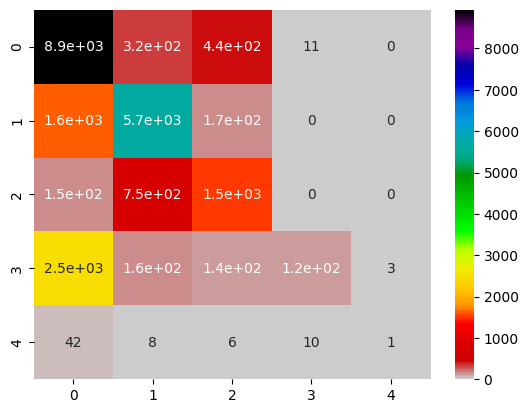

In [ ]:
import seaborn as sns

axes = sns.heatmap(confusion, annot=True, cmap='nipy_spectral_r')